In [1]:
import netStandalone
from utils import AG_v1
import numpy as np
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm

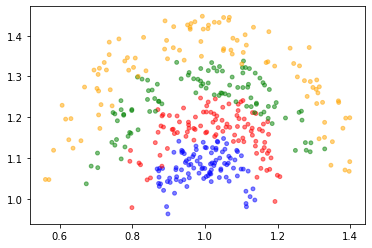

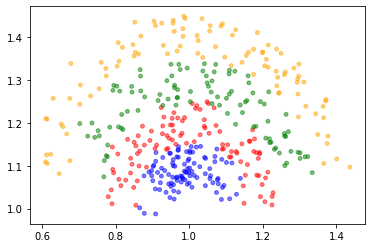

In [2]:
# np.random.seed(19680801)

COLOR_0 = 'blue'
COLOR_1 = 'red'
COLOR_2 = 'green'
COLOR_3 = 'orange'

N = 100
noise = 0.1

x = 4*[None]
y = 4*[None]
val_x = 4*[None]
val_y = 4*[None]
colors = 4*[None]
area = 15*np.ones(N)  # 0 to 15 point radii

p_x = 1
p_y = 1

r = 0.1
x[0] = 2*r*np.random.rand(N) -r
y[0] = np.sqrt(r**2 - x[0]*x[0]) + noise*(np.random.rand(N) - 0.5) #np.random.rand(N)
val_x[0] = 2*r*np.random.rand(N) -r
val_y[0] = np.sqrt(r**2 - val_x[0]*val_x[0]) + noise*(np.random.rand(N) - 0.5)
x[0] += p_x + noise*(np.random.rand(N) - 0.5)
y[0] += p_y
val_x[0] += p_x + noise*(np.random.rand(N) - 0.5)
val_y[0] += p_y
colors[0] = COLOR_0

r = 0.2
x[1] = 2*r*np.random.rand(N) -r
y[1] = np.sqrt(r**2 - x[1]*x[1]) + noise*(np.random.rand(N) - 0.5) #np.random.rand(N)
val_x[1] = 2*r*np.random.rand(N) -r
val_y[1] = np.sqrt(r**2 - val_x[1]*val_x[1]) + noise*(np.random.rand(N) - 0.5)
x[1] += p_x + noise*(np.random.rand(N) - 0.5)
y[1] += p_y
val_x[1] += p_x + noise*(np.random.rand(N) - 0.5)
val_y[1] += p_y
colors[1] = COLOR_1

r = 0.3
x[2] = 2*r*np.random.rand(N) -r
y[2] = np.sqrt(r**2 - x[2]*x[2]) + noise*(np.random.rand(N) - 0.5) #np.random.rand(N)
val_x[2] = 2*r*np.random.rand(N) -r
val_y[2] = np.sqrt(r**2 - val_x[2]*val_x[2]) + noise*(np.random.rand(N) - 0.5)
x[2] += p_x + noise*(np.random.rand(N) - 0.5)
y[2] += p_y
val_x[2] += p_x + noise*(np.random.rand(N) - 0.5)
val_y[2] += p_y
colors[2] = COLOR_2

r = 0.4
x[3] = 2*r*np.random.rand(N) -r
y[3] = np.sqrt(r**2 - x[3]*x[3]) + noise*(np.random.rand(N) - 0.5) #np.random.rand(N)
val_x[3] = 2*r*np.random.rand(N) -r
val_y[3] = np.sqrt(r**2 - val_x[3]*val_x[3]) + noise*(np.random.rand(N) - 0.5)
x[3] += p_x + noise*(np.random.rand(N) - 0.5)
y[3] += p_y
val_x[3] += p_x + noise*(np.random.rand(N) - 0.5)
val_y[3] += p_y
colors[3] = COLOR_3

plt.scatter(x[0], y[0], s=area, c=colors[0], alpha=0.5)
plt.scatter(x[1], y[1], s=area, c=colors[1], alpha=0.5)
plt.scatter(x[2], y[2], s=area, c=colors[2], alpha=0.5)
plt.scatter(x[3], y[3], s=area, c=colors[3], alpha=0.5)
plt.show()

plt.scatter(val_x[0], val_y[0], s=area, c=colors[0], alpha=0.5)
plt.scatter(val_x[1], val_y[1], s=area, c=colors[1], alpha=0.5)
plt.scatter(val_x[2], val_y[2], s=area, c=colors[2], alpha=0.5)
plt.scatter(val_x[3], val_y[3], s=area, c=colors[3], alpha=0.5)
plt.show()

In [3]:
pack_data_in = []
pack_rigth_outs = []
val_pack_data_in = []
val_pack_rigth_outs = []
for k in range(4):
    out = np.zeros(4)
    out[k] = 5
    for i in range(N):
        pack_data_in.append([x[k][i], y[k][i]])
        pack_rigth_outs.append(copy.deepcopy(out))
        val_pack_data_in.append([val_x[k][i], val_y[k][i]])
        val_pack_rigth_outs.append(copy.deepcopy(out))

my_ag = AG_v1.ag_handler(population_size = 150, n_ins =  2, n_outs = 4, net_imp = netStandalone.CPU)

Entrenamiento:


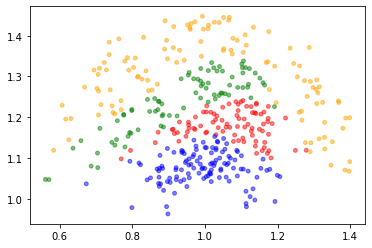

1790.695008000359
Colores acertados 327/400
Validación:


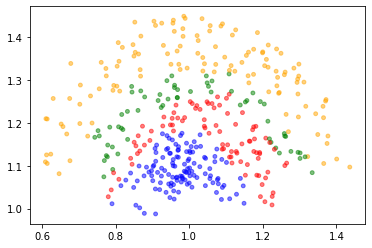

1853.9821005640551
Colores acertados 327/400


In [9]:
#Ordena y pinta el mejor

print("Entrenamiento:")
my_ag.screen(pack_data_in, pack_rigth_outs)
out = my_ag.exe_pack_best(pack_data_in)
color_out = []
colores_acertados = 0

for k in range(4):
    for i in range(int(len(out)/4)):
        aux = np.argsort(out[k*int(len(out)/4) + i])
        if aux[3] == k:
            colores_acertados += 1
        if aux[3] == 0:
            color_out.append(COLOR_0)
        if aux[3] == 1:
            color_out.append(COLOR_1)
        if aux[3] == 2:
            color_out.append(COLOR_2)
        if aux[3] == 3:
            color_out.append(COLOR_3)

p_x = np.concatenate((x[0],x[1],x[2],x[3]))
p_y = np.concatenate((y[0],y[1],y[2],y[3]))
plt.scatter(x, y, s=15, c=color_out, alpha=0.5)
plt.show()
print(my_ag.scores[my_ag.black_list[0]])
print("Colores acertados " + str(colores_acertados) + "/" + str(len(out)))


print("Validación:")
my_ag.screen(val_pack_data_in, val_pack_rigth_outs)
val_out = my_ag.exe_pack_best(val_pack_data_in)
val_color_out = []
colores_acertados = 0

for k in range(4):
    for i in range(int(len(out)/4)):
        aux = np.argsort(val_out[k*int(len(out)/4) + i])
        if aux[3] == k:
            colores_acertados += 1
        if aux[3] == 0:
            val_color_out.append(COLOR_0)
        if aux[3] == 1:
            val_color_out.append(COLOR_1)
        if aux[3] == 2:
            val_color_out.append(COLOR_2)
        if aux[3] == 3:
            val_color_out.append(COLOR_3)

v_x = np.concatenate((val_x[0],val_x[1],val_x[2],val_x[3]))
v_y = np.concatenate((val_y[0],val_y[1],val_y[2],val_y[3]))
plt.scatter(v_x, v_y, s=15, c=val_color_out, alpha=0.5)
plt.show()

print(my_ag.scores[my_ag.black_list[0]])
print("Colores acertados " + str(colores_acertados) + "/" + str(len(out)))


In [8]:
#Aprende
I = 10
best_perf = [my_ag.scores[my_ag.black_list[0]]]

for i in tqdm(range(I)):
    my_ag.learn(pack_data_in, pack_rigth_outs);
    my_ag.screen(pack_data_in, pack_rigth_outs)
    best_perf.append(my_ag.scores[my_ag.black_list[0]])

print(best_perf)

  0%|          | 0/10 [00:00<?, ?it/s]

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iterat

 10%|█         | 1/10 [00:05<00:53,  5.94s/it]

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
gradient minimized!
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration

 20%|██        | 2/10 [00:11<00:46,  5.78s/it]

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iterat

 30%|███       | 3/10 [00:17<00:39,  5.71s/it]

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iterat

 40%|████      | 4/10 [00:22<00:34,  5.67s/it]

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iterat

 50%|█████     | 5/10 [00:28<00:28,  5.67s/it]

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iterat

 60%|██████    | 6/10 [00:33<00:22,  5.55s/it]

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iterat

 70%|███████   | 7/10 [00:39<00:16,  5.50s/it]

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iterat

 80%|████████  | 8/10 [00:44<00:10,  5.42s/it]

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
gradient minimized!
Iteration 0
Iteration 1
I

 90%|█████████ | 9/10 [00:49<00:05,  5.36s/it]

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iterat

100%|██████████| 10/10 [00:55<00:00,  5.53s/it]

[2005.9479910451919, 1940.6086488384753, 1920.8620302844793, 1897.6905598845333, 1877.460444463417, 1858.2878362182528, 1846.0765145551413, 1836.299865707755, 1818.601714393124, 1804.8252769540995, 1790.695008000359]
